In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import seaborn as sns

## Dataset import

In [6]:

DataTR = pd.read_csv("strain.csv")
DataTR.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Data type info & Data description

In [7]:
#print(DataTR.info)
print(DataTR.describe())


               v2a1       hacdor        rooms       hacapo         v14a  \
count  2.697000e+03  9557.000000  9557.000000  9557.000000  9557.000000   
mean   1.652316e+05     0.038087     4.955530     0.023648     0.994768   
std    1.504571e+05     0.191417     1.468381     0.151957     0.072145   
min    0.000000e+00     0.000000     1.000000     0.000000     0.000000   
25%    8.000000e+04     0.000000     4.000000     0.000000     1.000000   
50%    1.300000e+05     0.000000     5.000000     0.000000     1.000000   
75%    2.000000e+05     0.000000     6.000000     0.000000     1.000000   
max    2.353477e+06     1.000000    11.000000     1.000000     1.000000   

            refrig         v18q        v18q1         r4h1         r4h2  ...  \
count  9557.000000  9557.000000  2215.000000  9557.000000  9557.000000  ...   
mean      0.957623     0.231767     1.404063     0.385895     1.559171  ...   
std       0.201459     0.421983     0.763131     0.680779     1.036574  ...   
min     

## finding Null , count total null values

In [8]:
print(DataTR.shape)
DataTR.isnull().values
DataTR.isnull().count()
DataTR.isnull().sum()

(9557, 143)


Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

## Handling missing values

In [9]:
#handling missing values
#DataTR=DataTR.fillna().mean()
DataTR['v2a1'] = DataTR['v2a1'].fillna(DataTR['v2a1'].mean())
DataTR['v18q1'] = DataTR['v18q1'].fillna(DataTR['v18q1'].mean())
print(DataTR.shape)
DataTR.isnull().sum()

(9557, 143)


Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
agesq              0
Target             0
Length: 143, dtype: int64

## Finding poverty level

In [10]:
#members of the house have the same poverty level.->No
v2a1_mean = DataTR['v2a1'].mean()

v2a1_mean

com_v2Mean= 165231<DataTR["v2a1"]
com_v2Mean


0        True
1       False
2        True
3        True
4        True
        ...  
9552    False
9553    False
9554    False
9555    False
9556    False
Name: v2a1, Length: 9557, dtype: bool

### Checking the family head

In [11]:
#Check if there is a house without a family head.

for i in DataTR["v2a1"]:
    print(i)
        
    
    if i> 165231:
        print("There is head in the Family")
        
    else:
        print("There is no head in the Family")
        
      

print(" ")


190000.0
There is head in the Family
135000.0
There is no head in the Family
165231.6069707082
There is head in the Family
180000.0
There is head in the Family
180000.0
There is head in the Family
180000.0
There is head in the Family
180000.0
There is head in the Family
130000.0
There is no head in the Family
130000.0
There is no head in the Family
130000.0
There is no head in the Family
130000.0
There is no head in the Family
100000.0
There is no head in the Family
100000.0
There is no head in the Family
165231.6069707082
There is head in the Family
165231.6069707082
There is head in the Family
90000.0
There is no head in the Family
90000.0
There is no head in the Family
90000.0
There is no head in the Family
90000.0
There is no head in the Family
215000.0
There is head in the Family
215000.0
There is head in the Family
150000.0
There is no head in the Family
150000.0
There is no head in the Family
100000.0
There is no head in the Family
100000.0
There is no head in the Family
100000.

In [12]:
# columns count
DataTR.info
DataTR.columns.value_counts()
DataTR.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

## Finding the unique value from every columns

In [13]:
for i in DataTR.columns:
    print(DataTR[i].unique(),"\t", DataTR[i].nunique())
    

['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491'] 	 9557
[ 190000.          135000.          165231.60697071  180000.
  130000.          100000.           90000.          215000.
  150000.          120000.           80000.          168000.
   40000.          155000.          200000.          350000.
  270000.          300000.          250000.          260000.
  564834.          175000.           25310.          400000.
  450000.          399378.          119813.          125518.
  125000.           60000.           35000.          160000.
  170000.          500000.          230000.          185000.
  220000.          570540.          342324.               0.
  127000.           52000.          240000.          278000.
   70000.          110000.          100297.          210000.
  770229.          285270.          145000.           96000.
  542013.           65000.           85000.          104000.
  275000.          140000.          280000

## Scatter plot for outlier

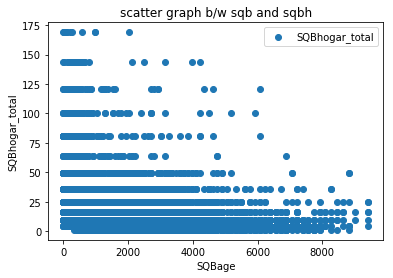

In [14]:
plt.scatter(DataTR["SQBage"], DataTR["SQBhogar_total"])
plt.xlabel("SQBage")
plt.ylabel("SQBhogar_total")
plt.title("scatter graph b/w sqb and sqbh")
plt.legend()
plt.show()

## Label encoding for categorial data

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
for i in DataTR.columns:
    DataTR[i]=le.fit_transform(DataTR[i])

In [30]:

DataTR.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,1523,95,0,2,0,1,1,0,1,0,...,10,43,0,10,0,10,0,82,43,3
1,9064,73,0,3,0,1,1,1,0,0,...,12,67,0,12,0,10,30,102,67,3
2,3948,83,0,7,0,1,1,0,1,0,...,11,92,0,0,0,4,30,92,92,3
3,8017,92,0,4,0,1,1,1,0,0,...,9,17,3,11,2,14,15,92,17,3
4,7984,92,0,4,0,1,1,1,0,0,...,11,37,3,11,2,14,15,92,37,3
5,8833,92,0,4,0,1,1,1,0,0,...,11,38,3,11,2,14,15,92,38,3
6,8758,92,0,4,0,1,1,1,0,0,...,2,8,3,11,2,14,15,92,8,3
7,2360,71,1,1,0,1,1,0,1,0,...,0,7,3,9,2,32,15,82,7,3
8,692,71,1,1,0,1,1,0,1,0,...,9,30,3,9,2,32,15,82,30,3
9,3098,71,1,1,0,1,1,0,1,0,...,11,28,3,9,2,32,15,82,28,3


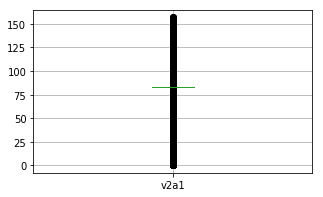

In [50]:
#need to plot hist graph
plt.figure(figsize=(5,3))
DataTR.boxplot(column= "v2a1", by=None)

In [ ]:
#fig2= plt.subplot()
#plt.figure(figsize=(21,12))
ax= plt.subplot()
sns.boxenplot(DataTR["v2a1"], data = DataTR)
#ax = sns.boxplot(DataTR)
plt.show()

#fig2.boxplot(DataTR)
#fig1,ax2 = plt.subplots()
#ax2.set_title('find baisness')
#ax2.boxplot(DataTR, notch=True)
#plt.show()

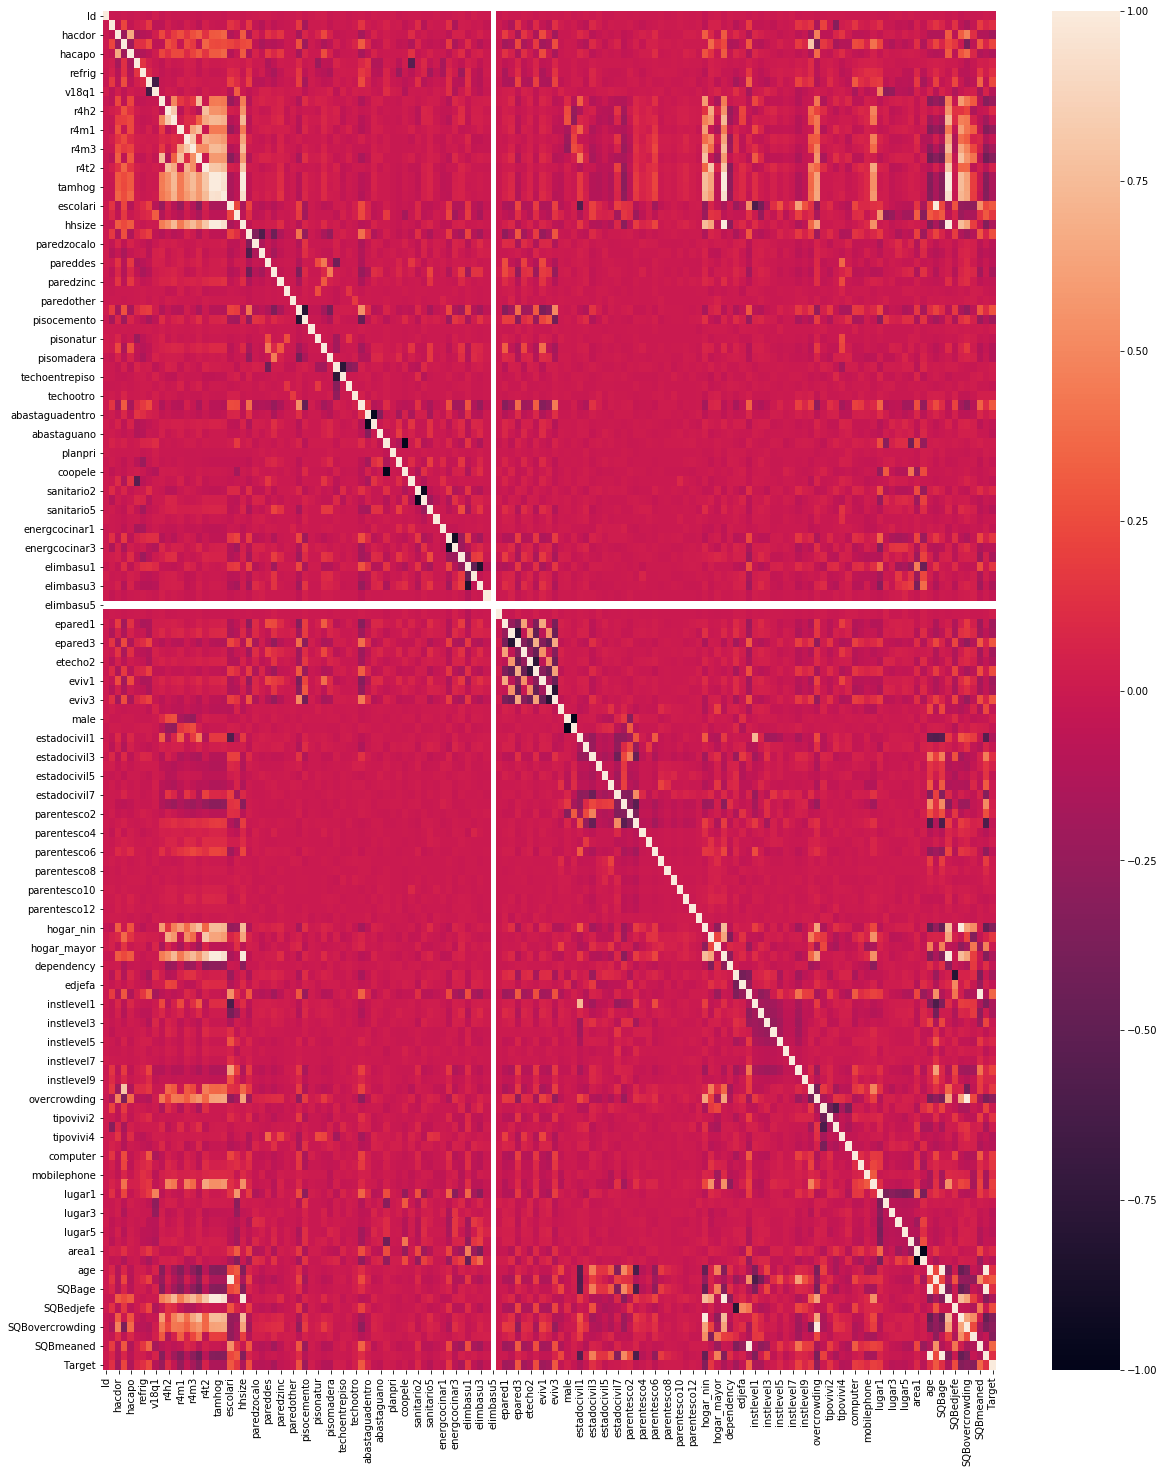

In [19]:
#Correlation=DataT.corr
fig = plt.figure(figsize=(20,25))
sns.heatmap(DataTR.corr())

## box plot for bais

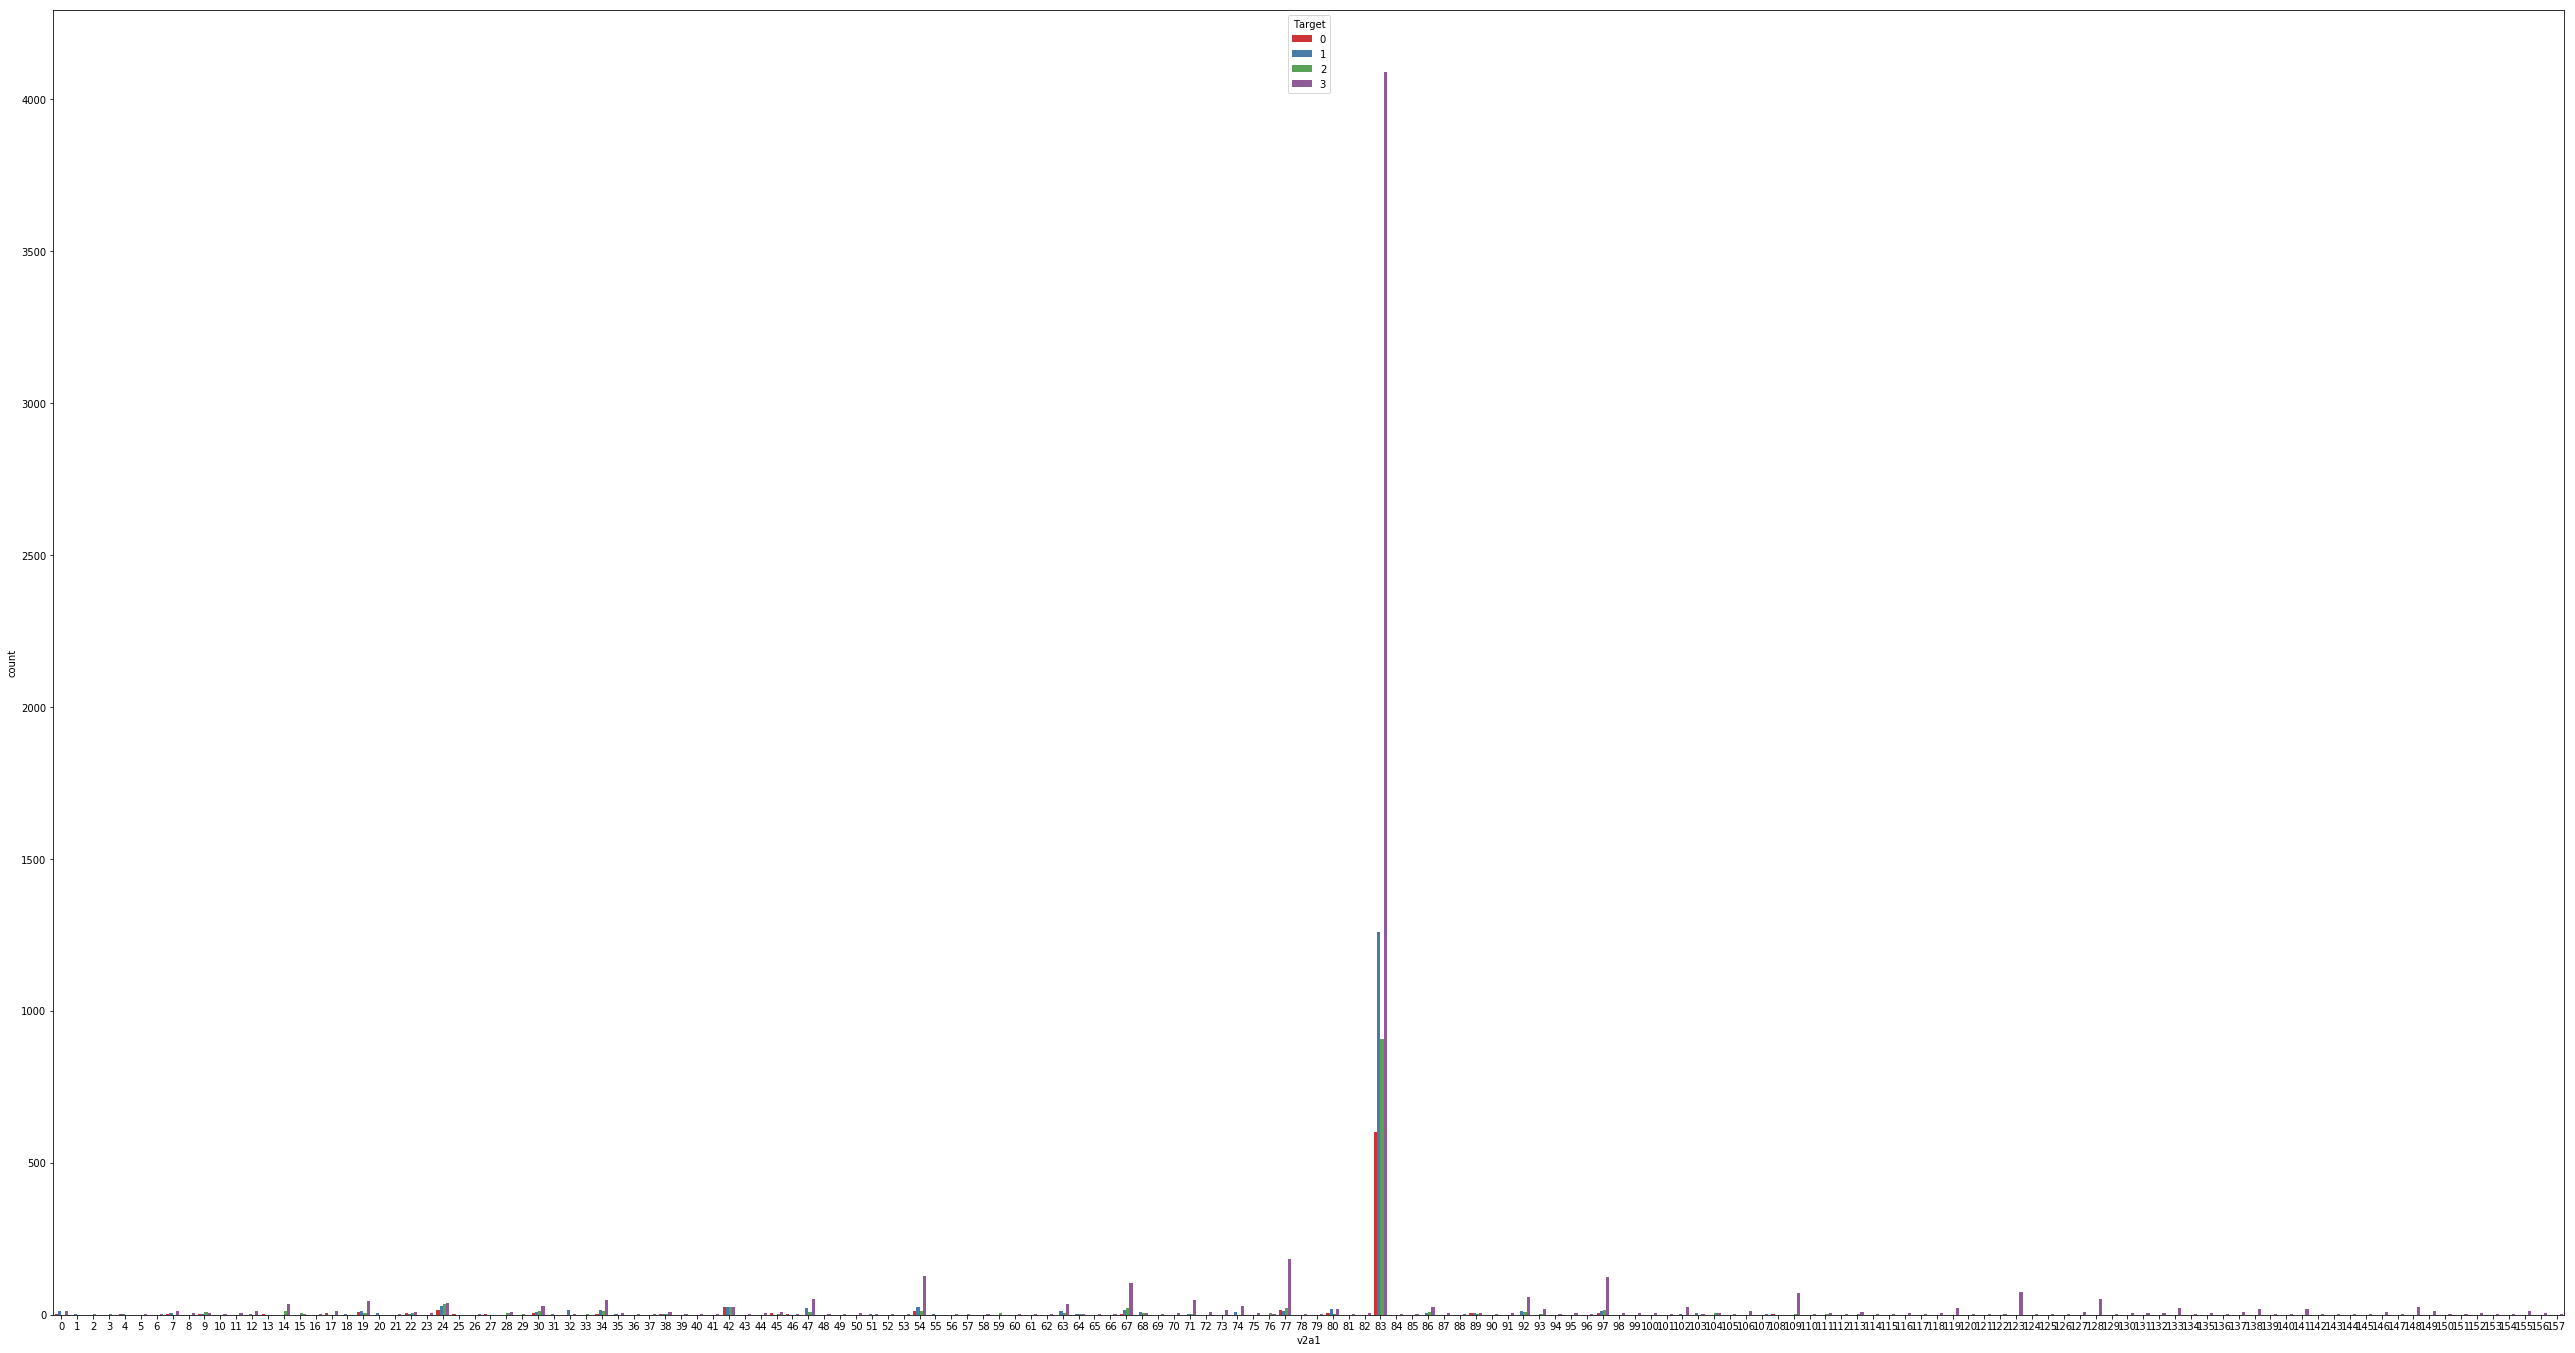

In [26]:
#i will do
#Q1 = train['Item_Visibility'].quantile(0.25)
#Q3 = train['Item_Visibility'].quantile(0.75)
#IQR = Q3 - Q1
#filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')
#fig, ax = plt.subplots()
#ax.boxplot(DataT)

#plt.show()

plt.figure(figsize=(45,24))

sns.countplot(x='v2a1',hue='Target',data=DataTR,palette='Set1')

In [30]:
DataTT = pd.read_csv("stest.csv")

DataTT['v2a1'] = DataTT['v2a1'].fillna(DataTT['v2a1'].mean())
DataTT.head(6)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,174872.554316,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,174872.554316,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,174872.554316,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,174872.554316,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.000000,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
5,ID_e77d38d45,400000.000000,0,3,0,1,1,1,1.0,0,...,38,256,1444,4,0,0,1.00,0.00,182.25,1444


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in DataTT.columns:
    DataTT[i]=le.fit_transform(DataTT[i])

In [45]:
DataTT.head(6)
X_test=DataTT
X_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,4399,122,0,4,0,1,1,0,3118,1,...,4,0,4,2,0,1,21,10,165,4
1,2562,122,0,4,0,1,1,0,11602,1,...,41,16,41,2,0,1,21,10,165,41
2,21347,122,0,4,0,1,1,0,11601,1,...,41,17,41,2,0,1,21,10,165,41
3,15791,122,0,13,0,1,1,1,0,0,...,59,16,59,0,16,0,14,0,162,59
4,15575,123,0,3,0,1,1,1,0,0,...,18,11,18,0,0,1,6,34,201,18


X = DataTR.drop('Target', axis=1)
y = DataTR.Target

## spliting the data

In [48]:
xtrain

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
7856,123,83,0,3,1,1,0,0,3238,2,...,12,4,12,8,0,8,28,30,20,12
469,4797,123,0,3,0,1,1,0,4488,0,...,39,12,39,3,9,2,14,15,87,39
2629,7512,83,0,4,0,1,1,1,1,1,...,35,11,35,3,11,2,14,15,92,35
4692,3925,83,0,6,0,1,1,1,0,0,...,27,11,27,4,0,0,13,0,108,27
9049,1947,24,0,2,0,1,1,0,2206,2,...,27,1,27,5,0,4,28,22,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4418,67,0,4,0,1,1,0,639,0,...,49,11,49,2,0,0,10,0,106,49
5191,5801,83,0,4,0,1,1,0,6319,0,...,84,1,84,2,1,0,7,22,10,84
5390,6263,83,0,1,0,1,1,0,5971,1,...,2,0,2,2,4,1,28,8,53,2
860,8092,119,0,2,0,1,1,0,5228,0,...,2,0,2,2,16,1,16,8,128,2


## Model building

In [51]:
model= LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## prediction

In [55]:
y_pred= model.predict(xtest)
y_pred

array([3, 3, 1, ..., 3, 3, 3])

cm = confusion_matrix(ytest,y_pred)
cm

## accuracy score

accuracy =accuracy_score(ytest,y_pred )
print(accuracy)

In [ ]:
## 

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


seed = 123
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
import warnings
warnings.filterwarnings("ignore")

0.6420107778921772
